In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [1]:
import session_info
session_info.show()

In [2]:
adata = sc.read_h5ad('/nfs/team205/ac65/ALI_COVID19/datasets_integration_ALI/multimap_harmonony_celltypist.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 615307 × 1880
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_S

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


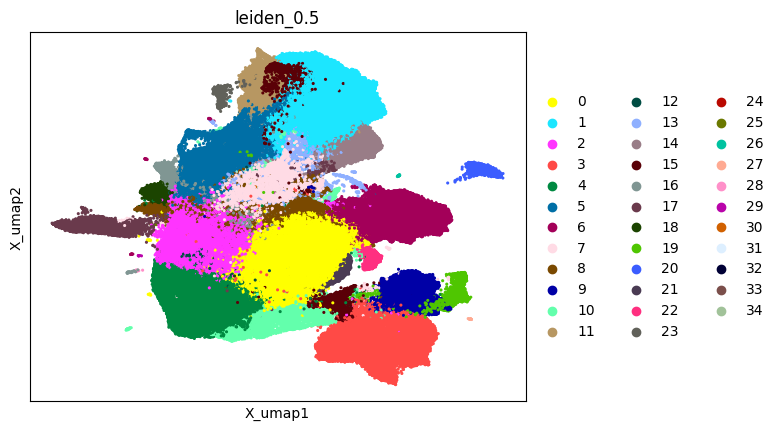

In [4]:
sc.pl.embedding(adata, 'X_umap', color = ['leiden_0.5'], size = 20)

In [5]:
adata

AnnData object with n_obs × n_vars = 615307 × 1880
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_S

In [6]:
adata.obs['leiden_0.5'] = adata.obs['leiden_0.5'].astype(str) + "_0"

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


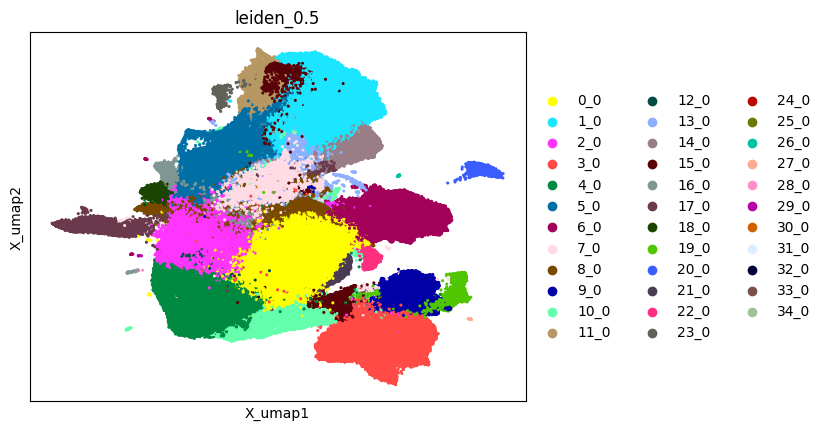

In [7]:
sc.pl.embedding(adata, 'X_umap', color = ['leiden_0.5'], size = 20)

# annotation of basaloid cells

In [8]:
# Subset data for fine-tuning
clusters_to_refine = ['2_0', '3_0', '4_0', '7_0', '9_0', '15_0', '20_0']  # Example: clusters to be fine-tuned
adata_refine = adata[adata.obs['leiden_0.5'].isin(clusters_to_refine)]

In [9]:
adata_refine

View of AnnData object with n_obs × n_vars = 238052 × 1880
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_a

In [10]:
# Fine-tune Leiden clustering for selected clusters
sc.tl.leiden(adata_refine, resolution=0.5)  # Adjust resolution as needed

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


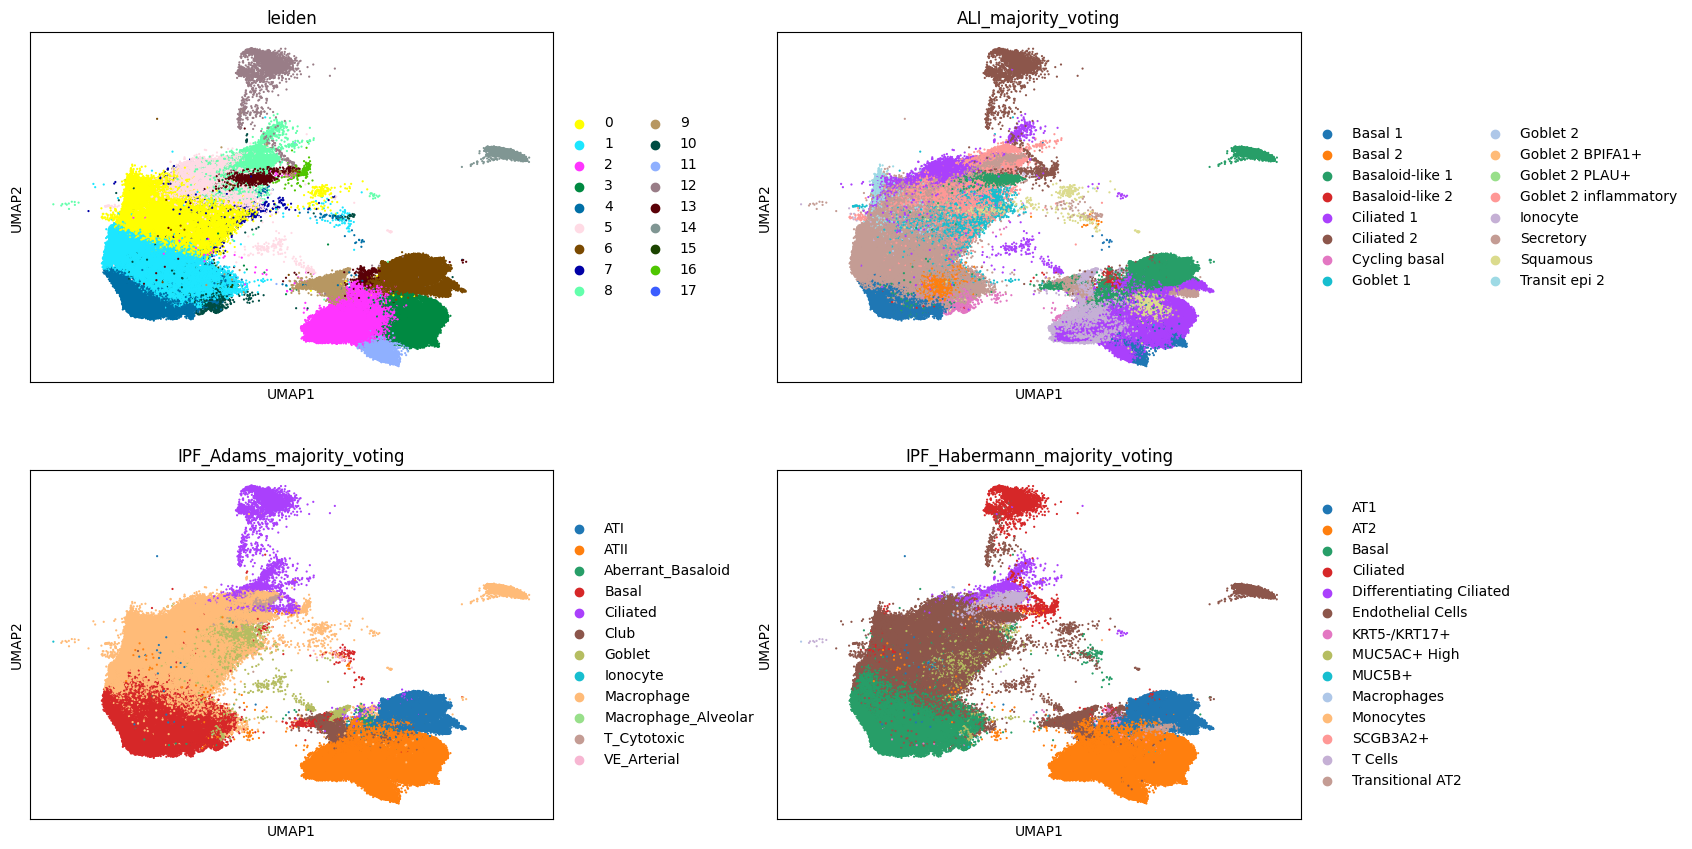

In [11]:
sc.pl.umap(adata_refine, color=['leiden', 'ALI_majority_voting', 
                                'IPF_Adams_majority_voting', 'IPF_Habermann_majority_voting'], ncols = 2, size = 10, wspace = 0.3)

In [12]:
np.unique(adata_refine.obs['leiden'])

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3',
       '4', '5', '6', '7', '8', '9'], dtype=object)

In [13]:
# Convert 'leiden' column to categorical
adata_refine.obs['leiden'] = pd.Categorical(adata_refine.obs['leiden'])

# Replace label "13" with "Basaloid"
adata_refine.obs['leiden'] = adata_refine.obs['leiden'].cat.rename_categories({'13': 'Basaloid'})


In [14]:
np.unique(adata_refine.obs['leiden'])

array(['0', '1', '10', '11', '12', '14', '15', '16', '17', '2', '3', '4',
       '5', '6', '7', '8', '9', 'Basaloid'], dtype=object)

In [15]:
# Assuming 'adata_refine' is your AnnData object

# Extract the 'leiden' column and indices from adata_refine.obs
leiden_data = adata_refine.obs[['leiden']]
indices = adata_refine.obs_names

# Create a DataFrame from the extracted data
df = pd.DataFrame(leiden_data, index=indices)

# Append the DataFrame to adata using AnnData.obs
adata.obs = adata.obs.join(df, how='left', rsuffix='_subset')

In [16]:
adata.obs['leiden_subset']

Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-AATCACGAGGGTCACA      2
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-GGTAACTAGTCCTACA      6
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-CATCCGTTCGCAAGAG      2
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-TTCGGTCAGCTTTCCC      2
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-TTAGGCATCCTCACTG      2
                                                                    ... 
Melms_2021.h5ad:AGCTTCCAGGCATGCA-1_27                                  2
Melms_2021.h5ad:GCACGGTCAGAAGTTA-1_27                                NaN
Melms_2021.h5ad:TTGTGGATCATAGGCT-1_27                                  2
Melms_2021.h5ad:GCCGATGAGTAAACGT-1_27                                  0
Melms_2021.h5ad:AGGGTGAGTATCAGGG-1_27                                NaN
Name: leiden_subset, Length: 615307, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


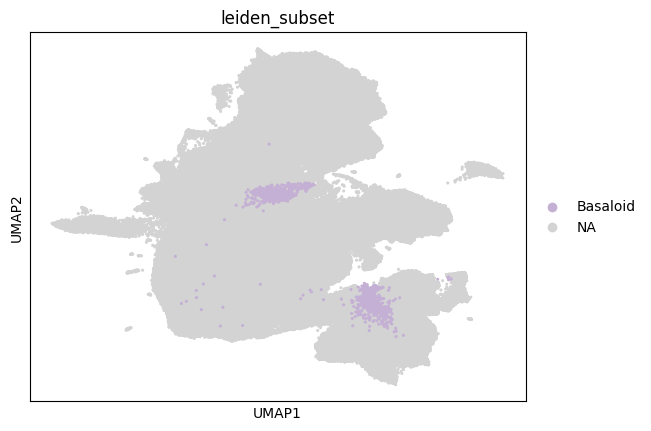

In [17]:
sc.pl.umap(adata, color = "leiden_subset", groups = "Basaloid", size = 20)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


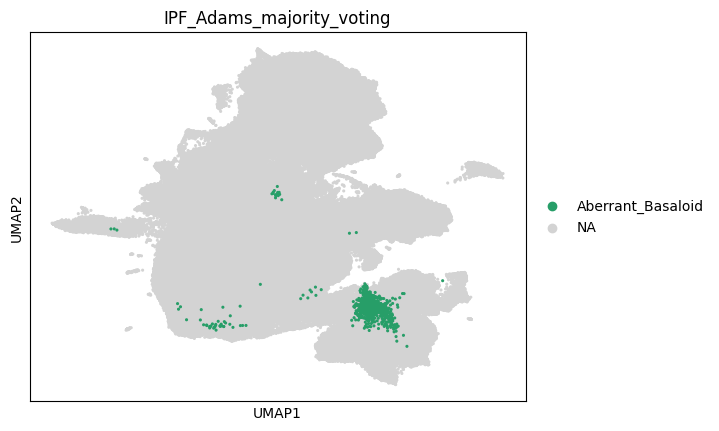

In [18]:
sc.pl.umap(adata, color = "IPF_Adams_majority_voting", groups = "Aberrant_Basaloid", size = 20)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


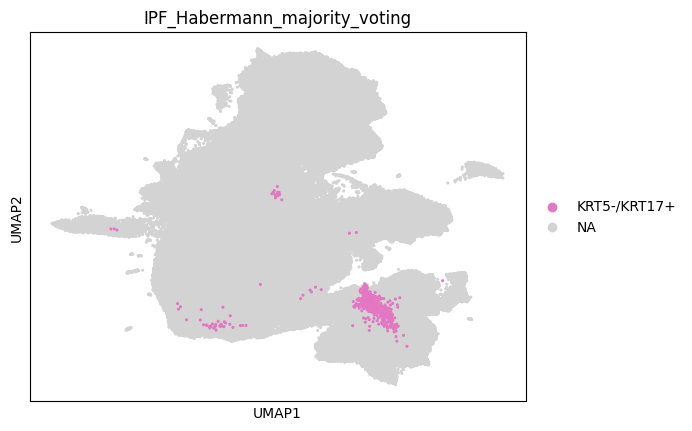

In [19]:
sc.pl.umap(adata, color = "IPF_Habermann_majority_voting", groups = "KRT5-/KRT17+", size = 20)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


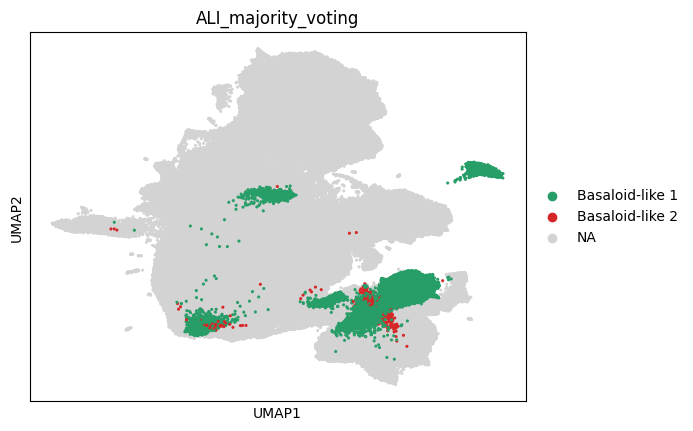

In [20]:
sc.pl.umap(adata, color = "ALI_majority_voting", groups = ["Basaloid-like 1", "Basaloid-like 2"], size = 20)

In [21]:
adata.obs['leiden_subset']

Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-AATCACGAGGGTCACA      2
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-GGTAACTAGTCCTACA      6
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-CATCCGTTCGCAAGAG      2
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-TTCGGTCAGCTTTCCC      2
Delorey_2021_COVID_only.h5ad:02-P005175-S053-R01-TTAGGCATCCTCACTG      2
                                                                    ... 
Melms_2021.h5ad:AGCTTCCAGGCATGCA-1_27                                  2
Melms_2021.h5ad:GCACGGTCAGAAGTTA-1_27                                NaN
Melms_2021.h5ad:TTGTGGATCATAGGCT-1_27                                  2
Melms_2021.h5ad:GCCGATGAGTAAACGT-1_27                                  0
Melms_2021.h5ad:AGGGTGAGTATCAGGG-1_27                                NaN
Name: leiden_subset, Length: 615307, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


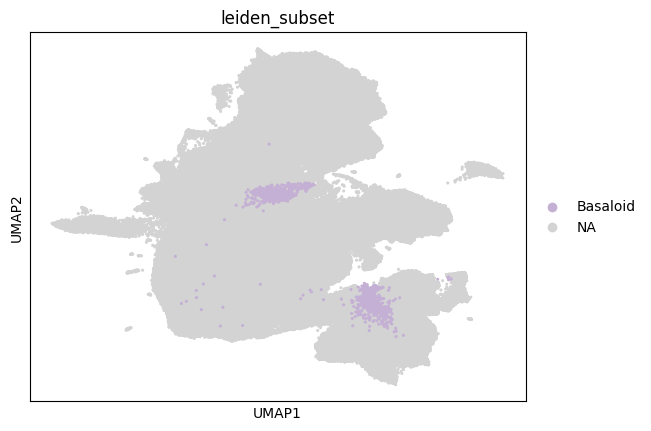

In [22]:
sc.pl.umap(adata, color = "leiden_subset", groups = ["Basaloid"], size = 20)

In [23]:
pd.crosstab(adata.obs['leiden_0.5'], adata.obs['leiden_subset'])

leiden_subset      0      1      2      3      4      5      6      7     8  \
leiden_0.5                                                                    
2_0            70311  10264     25     30      2   2500      8  10585    53   
3_0                3      4  27249  20561      3      4     31      0     0   
4_0                5  32612      2      1  14544     14      1      1     5   
7_0                4      0      1      0      0  11872     13     38  5503   
9_0                0      1     80      0      0      0  14136      0     3   
15_0               0      0      3      0      0      0      0      0     0   
20_0               0      0      0      0      0      0      0      0     0   

leiden_subset     9    10    11    12  Basaloid    14   15   16  17  
leiden_0.5                                                           
2_0               1    30     0     0         1     0   11   12  11  
3_0              21    81  2955     0       804     0    0    0   0  
4_0               5  3091     0     0         9     0  986    1   0  
7_0               2    25     0   120       952     0   23  235   0  
9_0               0     0     2     0        52     0    0    0   0  
15_0           4073     0     0  2217        28     0    0    0   0  
20_0              0     0     0     0         0  1832    0    0   0

In [24]:
adata

AnnData object with n_obs × n_vars = 615307 × 1880
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_S

In [25]:
np.unique(adata.obs['leiden_0.5'])

array(['0_0', '10_0', '11_0', '12_0', '13_0', '14_0', '15_0', '16_0',
       '17_0', '18_0', '19_0', '1_0', '20_0', '21_0', '22_0', '23_0',
       '24_0', '25_0', '26_0', '27_0', '28_0', '29_0', '2_0', '30_0',
       '31_0', '32_0', '33_0', '34_0', '3_0', '4_0', '5_0', '6_0', '7_0',
       '8_0', '9_0'], dtype=object)

In [26]:
adata.obs['leiden_subset'] = adata.obs['leiden_subset'].astype(str)
np.unique(adata.obs['leiden_subset'])

array(['0', '1', '10', '11', '12', '14', '15', '16', '17', '2', '3', '4',
       '5', '6', '7', '8', '9', 'Basaloid', 'nan'], dtype=object)

In [27]:
adata.obs['leiden_combined'] = adata.obs['leiden_0.5']
adata.obs['leiden_combined'] = adata.obs['leiden_combined'].astype(str)

In [28]:
matching_indices = adata.obs_names.isin(adata_refine.obs_names)
adata.obs.loc[matching_indices, 'leiden_combined'] = adata.obs.loc[matching_indices, 'leiden_subset']

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


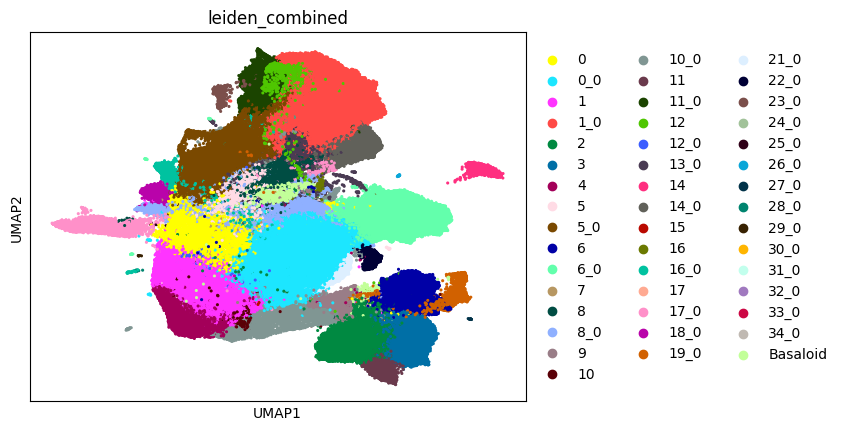

In [29]:
sc.pl.umap(adata, color = 'leiden_combined', size = 20)

In [30]:
adata

AnnData object with n_obs × n_vars = 615307 × 1880
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_S

In [54]:
import anndata
bdata = anndata.AnnData(adata.raw.X, var=adata.raw.var, obs=adata.obs, obsm = adata.obsm, obsp = adata.obsp, uns = adata.uns)

In [55]:
bdata

AnnData object with n_obs × n_vars = 615307 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [57]:
bdata.obs['leiden_combined'] = bdata.obs['leiden_combined'].astype(str)
clusters_to_delete = ['34_0', '33_0', '31_0', '32_0']

# Create a boolean mask for cells not belonging to the specified clusters
mask = ~np.isin(adata.obs['leiden_combined'], clusters_to_delete)

# Subset the AnnData object
bdata = bdata[mask]

In [58]:
np.unique(bdata.obs['leiden_combined'])

array(['0', '0_0', '1', '10', '10_0', '11', '11_0', '12', '12_0', '13_0',
       '14', '14_0', '15', '16', '16_0', '17', '17_0', '18_0', '19_0',
       '1_0', '2', '21_0', '22_0', '23_0', '24_0', '25_0', '26_0', '27_0',
       '28_0', '29_0', '3', '30_0', '4', '5', '5_0', '6', '6_0', '7', '8',
       '8_0', '9', 'Basaloid'], dtype=object)

In [ ]:
sc.tl.rank_genes_groups(bdata, 'leiden_combined')

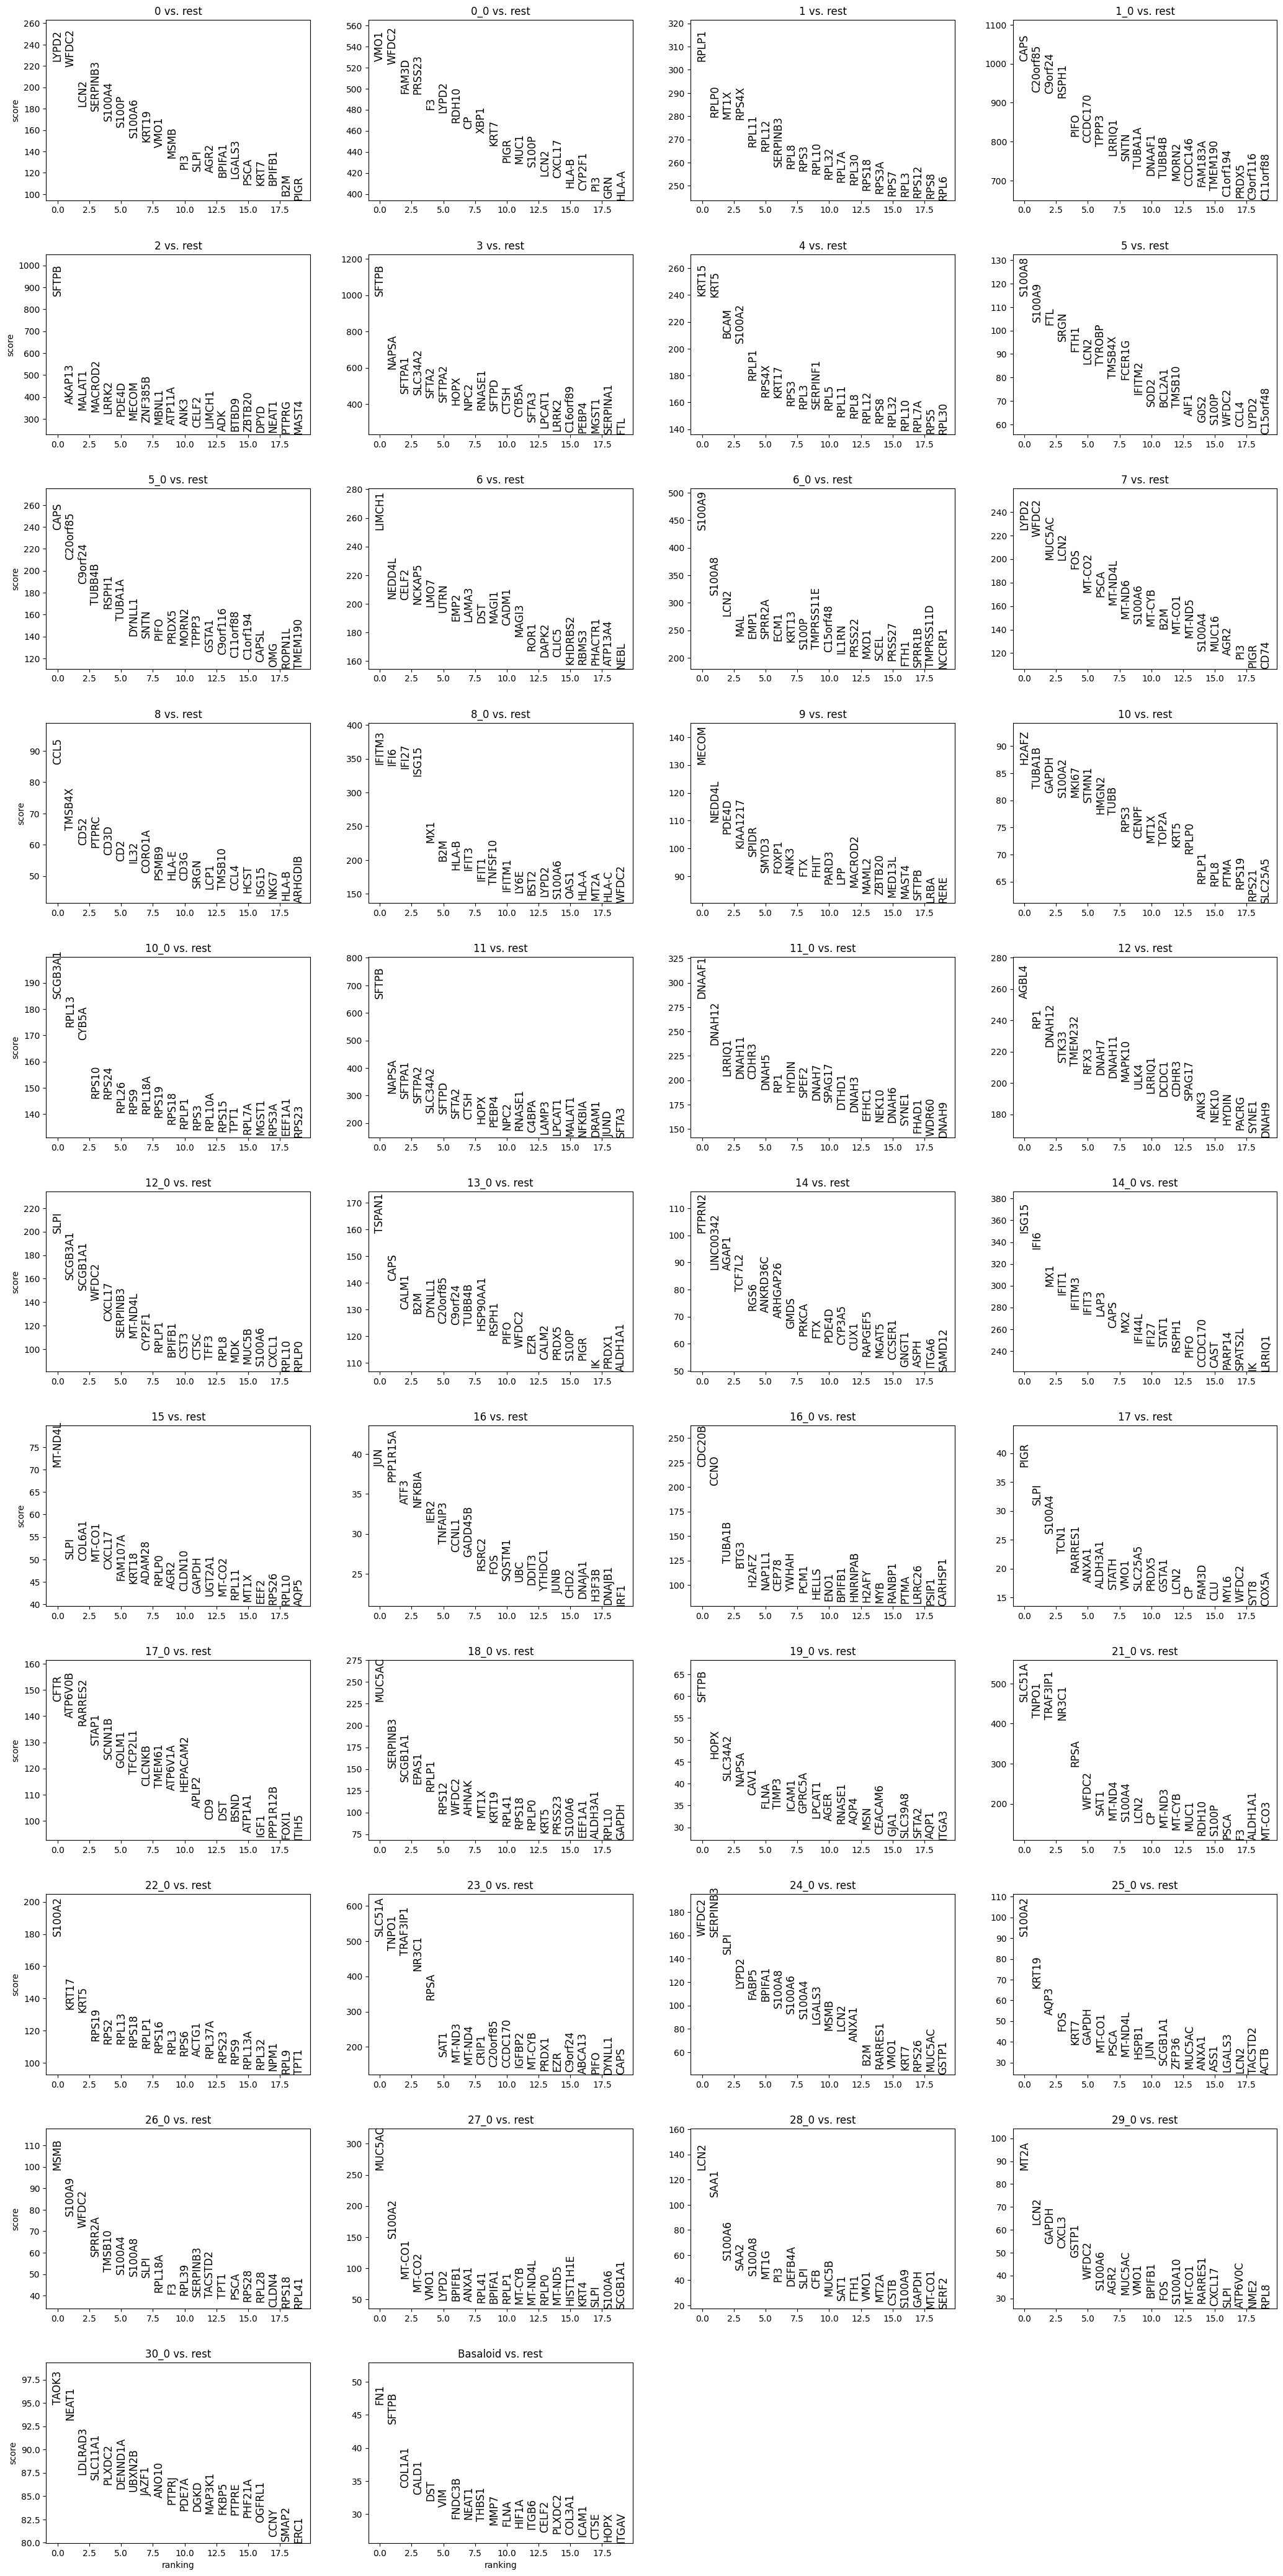

In [63]:
sc.pl.rank_genes_groups(bdata, n_genes=20, sharey=False, fontsize=12)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


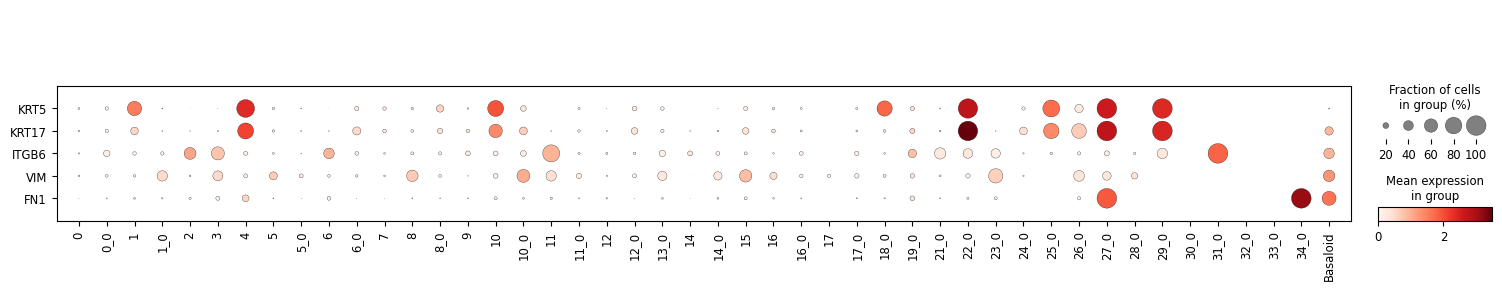

In [61]:
sc.pl.dotplot(adata, ['KRT5', 'KRT17', 'ITGB6', 'VIM', 'FN1'], groupby = "leiden_combined", swap_axes = True)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


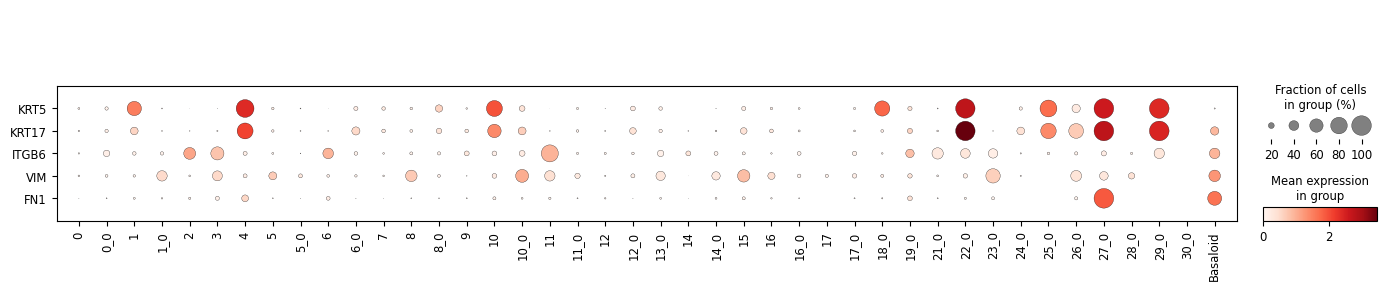

In [62]:
sc.pl.dotplot(bdata, ['KRT5', 'KRT17', 'ITGB6', 'VIM', 'FN1'], groupby = "leiden_combined", swap_axes = True)

In [64]:
bdata

AnnData object with n_obs × n_vars = 615303 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [67]:
bdata.obs['leiden_combined'].value_counts()

0_0         126509
1_0          98910
0            70323
1            42881
5_0          38310
2            27360
6_0          26745
3            20592
8_0          15111
4            14549
5            14390
6            14189
10_0         13957
11_0         11644
7            10624
12_0          8746
13_0          8609
14_0          6469
16_0          6122
17_0          5780
8             5564
9             4102
18_0          3673
10            3227
11            2957
19_0          2456
12            2337
Basaloid      1846
14            1832
21_0          1688
22_0          1391
15            1020
23_0           944
16             248
24_0            76
25_0            44
26_0            22
27_0            18
28_0            18
17              11
29_0             7
30_0             2
Name: leiden_combined, dtype: int64

In [83]:
df = pd.crosstab(bdata.obs['author_ann_harmonised_broad'], bdata.obs['leiden_combined'])
df.to_csv('leiden_author_ann.csv')

In [136]:
bdata

AnnData object with n_obs × n_vars = 615303 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [137]:
bdata.write('/nfs/team205/ac65/ALI_COVID19/datasets_integration_ALI/integrated_object_log1p_leiden_combined.h5ad')

In [148]:
np.unique(bdata.obs.age_status)

array(['adolescent-COVID19', 'adolescent-Healthy', 'adult-COVID19',
       'adult-Healthy', 'adult-Other PF', 'adult-Post-COVID',
       'elderly-COVID19', 'elderly-Healthy', 'elderly-IPF',
       'elderly-Other PF', 'infant-COVID19', 'infant-Healthy',
       'infant-Post-COVID', 'nan-COVID19', 'nan-Healthy',
       'old_adult-COVID19', 'old_adult-Healthy', 'old_adult-IPF',
       'old_adult-Other PF', 'paediatric-COVID19', 'paediatric-Healthy',
       'paediatric-Post-COVID', 'young_adult-COVID19',
       'young_adult-Healthy'], dtype=object)

In [144]:
bdata.obs['age_status'] = bdata.obs['age_status'].astype(str)

In [145]:
bdata.obs['age_status_coarse'] = bdata.obs['age_status']

In [151]:
bdata= bdata[bdata.obs['age_status'] != 'nan-COVID19']

In [152]:
bdata= bdata[bdata.obs['age_status'] != 'nan-Healthy']

In [153]:
np.unique(bdata.obs.age_status)

array(['adolescent-COVID19', 'adolescent-Healthy', 'adult-COVID19',
       'adult-Healthy', 'adult-Other PF', 'adult-Post-COVID',
       'elderly-COVID19', 'elderly-Healthy', 'elderly-IPF',
       'elderly-Other PF', 'infant-COVID19', 'infant-Healthy',
       'infant-Post-COVID', 'old_adult-COVID19', 'old_adult-Healthy',
       'old_adult-IPF', 'old_adult-Other PF', 'paediatric-COVID19',
       'paediatric-Healthy', 'paediatric-Post-COVID',
       'young_adult-COVID19', 'young_adult-Healthy'], dtype=object)

In [154]:
# Replace 'infant-Post-COVID' with 'paediatric-Post-COVID'
bdata.obs['age_status'] = bdata.obs['age_status'].replace('infant-Post-COVID', 'paediatric-Post-COVID')
bdata.obs['age_status'] = bdata.obs['age_status'].replace('infant-COVID19', 'paediatric-COVID19')
bdata.obs['age_status'] = bdata.obs['age_status'].replace('infant-Healthy', 'paediatric-Healthy')
# Verify the updated values
print(bdata.obs['age_status'].unique())


/tmp/ipykernel_172852/3919074101.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bdata.obs['age_status'] = bdata.obs['age_status'].replace('infant-Post-COVID', 'paediatric-Post-COVID')


['old_adult-COVID19' 'elderly-COVID19' 'adult-COVID19'
 'paediatric-Healthy' 'adolescent-Healthy' 'paediatric-COVID19'
 'adolescent-COVID19' 'young_adult-COVID19' 'adult-Post-COVID'
 'paediatric-Post-COVID' 'adult-Healthy' 'elderly-Healthy'
 'old_adult-Healthy' 'young_adult-Healthy' 'elderly-IPF'
 'old_adult-Other PF' 'old_adult-IPF' 'elderly-Other PF' 'adult-Other PF']


In [155]:
bdata.write('/nfs/team205/ac65/ALI_COVID19/datasets_integration_ALI/integrated_object_log1p_leiden_combined.h5ad')

# Show goblet inflammatory cells  

In [156]:
subset_adata = bdata[bdata.obs['leiden_combined'].isin(['8_0'])]

In [157]:
cluster_data = subset_adata.obs.groupby('age_status').size()
cluster_data.sort_values(ascending=False)

age_status
elderly-COVID19          8141
paediatric-COVID19       3385
adult-COVID19            1899
old_adult-COVID19         790
adolescent-COVID19        427
young_adult-COVID19       300
paediatric-Healthy         71
adolescent-Healthy         32
adult-Healthy              19
elderly-Healthy            15
elderly-IPF                13
old_adult-Healthy           6
young_adult-Healthy         6
old_adult-IPF               4
paediatric-Post-COVID       2
adult-Post-COVID            1
dtype: int64

In [158]:
# Group the filtered data by age groups and count the number of cells
grouped_data = bdata.obs.groupby('age_status').size()
grouped_data.sort_values(ascending=False)

age_status
elderly-COVID19          96440
paediatric-Healthy       77802
old_adult-COVID19        61588
adult-COVID19            53440
paediatric-COVID19       49909
elderly-Healthy          41541
adolescent-COVID19       41277
adult-Healthy            38322
old_adult-Healthy        37351
adolescent-Healthy       34906
young_adult-COVID19      27279
elderly-IPF              17413
young_adult-Healthy      17388
old_adult-IPF             7464
adult-Post-COVID          5038
paediatric-Post-COVID     3545
old_adult-Other PF        3325
elderly-Other PF           473
adult-Other PF             194
dtype: int64

In [159]:
# Normalize the number of cells to a total of 5000 cells per age group
normalized_data = (cluster_data / grouped_data) * 5000

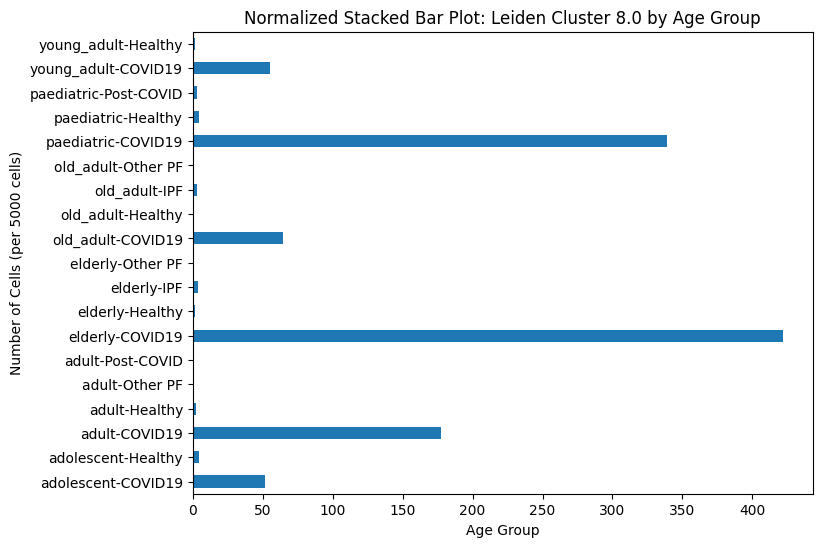

In [160]:
# Plot stacked bar plot with switched axes
plt.figure(figsize=(8, 6))
normalized_data.plot(kind='barh', stacked=True)

# Set labels and title
plt.ylabel('Number of Cells (per 5000 cells)')
plt.xlabel('Age Group')
plt.title('Normalized Stacked Bar Plot: Leiden Cluster 8.0 by Age Group')

# Show the plot
plt.show()

# Show basaloid cells  

In [170]:
subset_adata = bdata[bdata.obs['leiden_combined'].isin(['Basaloid'])]
cluster_data = subset_adata.obs.groupby('age_status').size()
cluster_data.sort_values(ascending=False)

age_status
elderly-COVID19        861
elderly-IPF            247
old_adult-COVID19      222
old_adult-IPF          110
elderly-Healthy         84
paediatric-COVID19      83
old_adult-Other PF      80
young_adult-COVID19     58
adolescent-COVID19      35
paediatric-Healthy      29
adult-COVID19           14
adult-Healthy            6
old_adult-Healthy        6
young_adult-Healthy      4
adolescent-Healthy       1
adult-Other PF           1
elderly-Other PF         1
dtype: int64

In [171]:
# Group the filtered data by age groups and count the number of cells
grouped_data = bdata.obs.groupby('age_status').size()
grouped_data.sort_values(ascending=False)

age_status
elderly-COVID19          96440
paediatric-Healthy       77802
old_adult-COVID19        61588
adult-COVID19            53440
paediatric-COVID19       49909
elderly-Healthy          41541
adolescent-COVID19       41277
adult-Healthy            38322
old_adult-Healthy        37351
adolescent-Healthy       34906
young_adult-COVID19      27279
elderly-IPF              17413
young_adult-Healthy      17388
old_adult-IPF             7464
adult-Post-COVID          5038
paediatric-Post-COVID     3545
old_adult-Other PF        3325
elderly-Other PF           473
adult-Other PF             194
dtype: int64

In [172]:
# Normalize the number of cells to a total of 5000 cells per age group
normalized_data = (cluster_data / grouped_data) * 5000
normalized_data.sort_values(ascending=False)

age_status
old_adult-Other PF       120.300752
old_adult-IPF             73.687031
elderly-IPF               70.924022
elderly-COVID19           44.639154
adult-Other PF            25.773196
old_adult-COVID19         18.022991
young_adult-COVID19       10.630888
elderly-Other PF          10.570825
elderly-Healthy           10.110493
paediatric-COVID19         8.315134
adolescent-COVID19         4.239649
paediatric-Healthy         1.863705
adult-COVID19              1.309880
young_adult-Healthy        1.150219
old_adult-Healthy          0.803191
adult-Healthy              0.782840
adolescent-Healthy         0.143242
adult-Post-COVID                NaN
paediatric-Post-COVID           NaN
dtype: float64

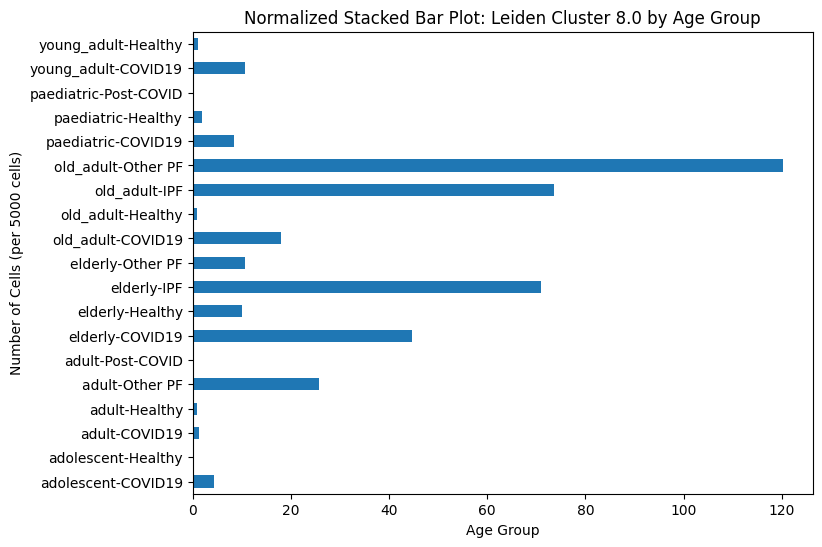

In [173]:
# Plot stacked bar plot with switched axes
plt.figure(figsize=(8, 6))
normalized_data.plot(kind='barh', stacked=True)

# Set labels and title
plt.ylabel('Number of Cells (per 5000 cells)')
plt.xlabel('Age Group')
plt.title('Normalized Stacked Bar Plot: Leiden Cluster 8.0 by Age Group')

# Show the plot
plt.show()

In [167]:
normalized_data.sort_values(ascending=False)

age_status
old_adult-Other PF       120.300752
old_adult-IPF             73.687031
elderly-IPF               70.924022
elderly-COVID19           44.639154
adult-Other PF            25.773196
old_adult-COVID19         18.022991
young_adult-COVID19       10.630888
elderly-Other PF          10.570825
elderly-Healthy           10.110493
paediatric-COVID19         8.315134
adolescent-COVID19         4.239649
paediatric-Healthy         1.863705
adult-COVID19              1.309880
young_adult-Healthy        1.150219
old_adult-Healthy          0.803191
adult-Healthy              0.782840
adolescent-Healthy         0.143242
adult-Post-COVID                NaN
paediatric-Post-COVID           NaN
dtype: float64

In [179]:
bdata

AnnData object with n_obs × n_vars = 614695 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [180]:
bdata.obs['leiden_combined_fine'] = bdata.obs['leiden_combined']

In [182]:
np.unique(bdata.obs['leiden_combined'])

array(['0', '0_0', '1', '10', '10_0', '11', '11_0', '12', '12_0', '13_0',
       '14', '14_0', '15', '16', '16_0', '17', '17_0', '18_0', '19_0',
       '1_0', '2', '21_0', '22_0', '23_0', '24_0', '25_0', '26_0', '27_0',
       '28_0', '29_0', '3', '30_0', '4', '5', '5_0', '6', '6_0', '7', '8',
       '8_0', '9', 'Basaloid'], dtype=object)

# fine grained annotation of basaloid cells

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
bdata = sc.read_h5ad('/nfs/team205/ac65/ALI_COVID19/datasets_integration_ALI/integrated_object_log1p_leiden_combined.h5ad')

In [3]:
bdata

AnnData object with n_obs × n_vars = 614695 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [4]:
adata = sc.read_h5ad('/nfs/team205/ac65/ALI_COVID19/datasets_integration_ALI/multimap_harmonony_celltypist.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 615307 × 1880
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_S

In [6]:
adata= adata[adata.obs['age_status'] != 'nan-COVID19']

In [7]:
adata= adata[adata.obs['age_status'] != 'nan-Healthy']

In [8]:
adata.obs['leiden_0.5'].value_counts()

0     126505
1      98796
2      93843
3      51612
4      51274
5      38305
6      26745
7      18696
8      15111
9      14145
10     13946
11     11611
12      8746
13      8609
14      6469
15      6241
16      6121
17      5779
18      3673
19      2426
20      1832
21      1688
22      1391
23       944
24        76
25        44
26        22
27        18
28        18
29         7
30         2
31         1
32         1
33         1
Name: leiden_0.5, dtype: int64

In [9]:
adata.obs['leiden_0.5'] = adata.obs['leiden_0.5'].astype(str)
clusters_to_delete = ['31', '32', '33']

# Create a boolean mask for cells not belonging to the specified clusters
mask = ~np.isin(adata.obs['leiden_0.5'], clusters_to_delete)

# Subset the AnnData object
adata = adata[mask]

/tmp/ipykernel_79175/2885376437.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden_0.5'] = adata.obs['leiden_0.5'].astype(str)


In [10]:
import anndata
adata = anndata.AnnData(bdata.X, var=bdata.var, obs=bdata.obs, obsm = adata.obsm, obsp = adata.obsp, uns = adata.uns)

In [11]:
# Subset data for fine-tuning
clusters_to_refine = ['Basaloid']  # Example: clusters to be fine-tuned
adata_refine = adata[adata.obs['leiden_combined'].isin(clusters_to_refine)]

In [12]:
adata_refine

View of AnnData object with n_obs × n_vars = 1842 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_an

In [13]:
# Fine-tune Leiden clustering for selected clusters
sc.tl.leiden(adata_refine, resolution=0.5)  # Adjust resolution as needed

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


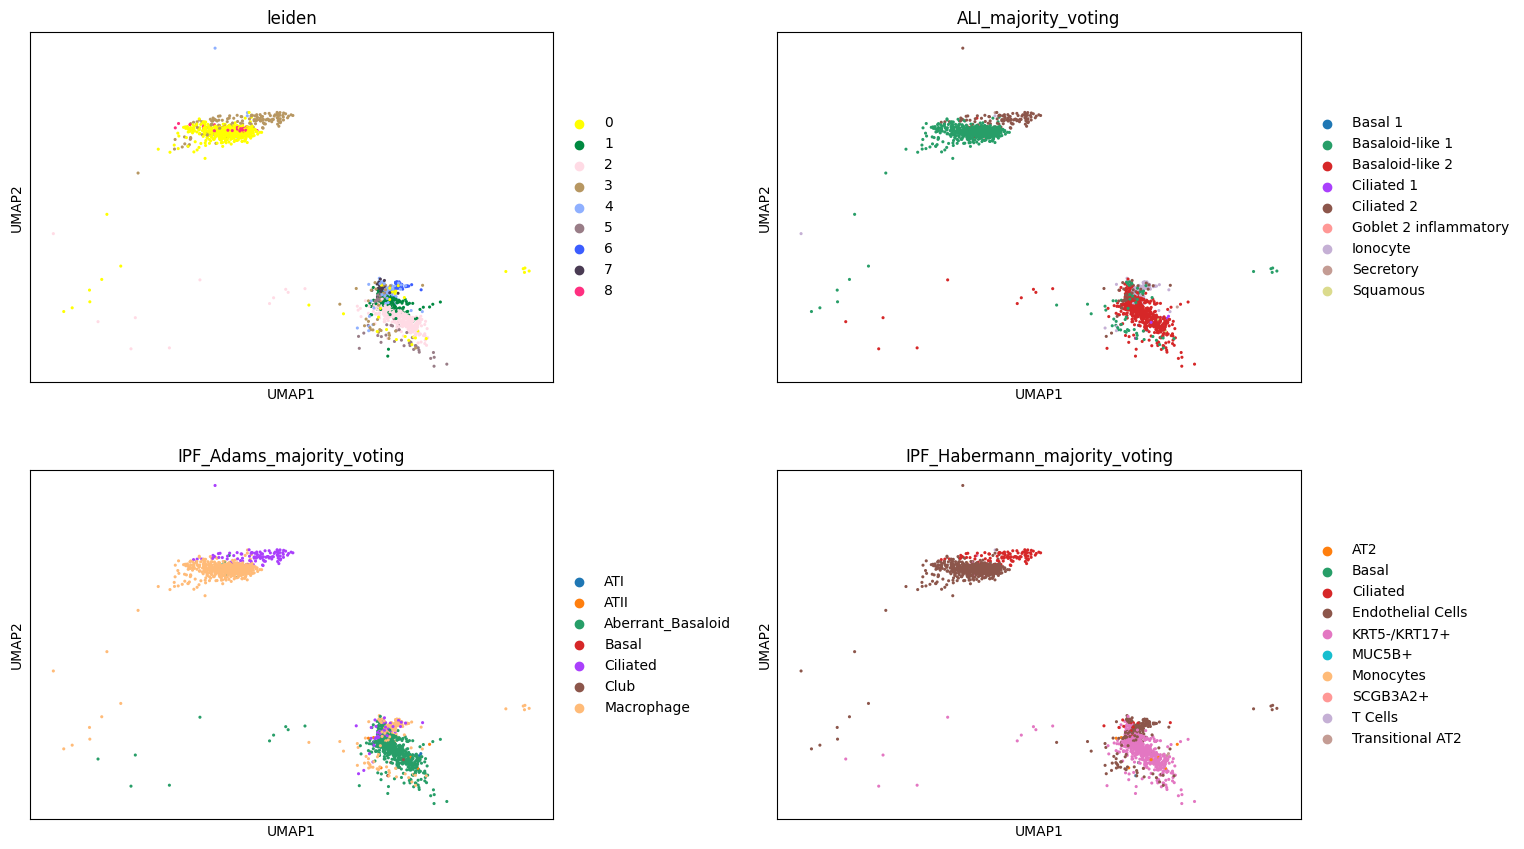

In [14]:
sc.pl.umap(adata_refine, color=['leiden', 'ALI_majority_voting', 
                                'IPF_Adams_majority_voting', 'IPF_Habermann_majority_voting'], ncols = 2, size = 20, wspace = 0.3)

In [15]:
pd.crosstab(adata_refine.obs['leiden'], adata_refine.obs['ALI_majority_voting'])

ALI_majority_voting  Basal 1  Basaloid-like 1  Basaloid-like 2  Ciliated 1  \
leiden                                                                       
0                          0              618                0           0   
1                          0                1              404           0   
2                          2                4              342           5   
3                          0               59               18           0   
4                          0                7                0           0   
5                          0                1               35           0   
6                          0                0                0           0   
7                          0                1               39           0   
8                          0               30                0           0   

ALI_majority_voting  Ciliated 2  Goblet 2 inflammatory  Ionocyte  Secretory  \
leiden                                                                        
0                             1                      0         0          0   
1                             0                      0         0          1   
2                             0                      0         1          0   
3                           111                      1         0          0   
4                            14                      0        79          1   
5                            14                      0         0          0   
6                             0                      0        49          0   
7                             1                      0         1          0   
8                             0                      0         0          0   

ALI_majority_voting  Squamous  
leiden                         
0                           1  
1                           0  
2                           1  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0

In [16]:
adata

AnnData object with n_obs × n_vars = 614695 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [17]:
# Convert 'leiden' column to categorical
adata_refine.obs['leiden'] = pd.Categorical(adata_refine.obs['leiden'])

In [18]:
category_mapping = {
    '0': 'Basaloid-like 1',
    '8': 'Basaloid-like 1',
    '3': 'Basaloid-like 1',
    '1': 'Basaloid-like 2',
    '2': 'Basaloid-like 2',
    '4': 'Basaloid-like 2',
    '5': 'Basaloid-like 2',
    '6': 'Basaloid-like 2',
    '7': 'Basaloid-like 2',

}

adata_refine.obs['leiden'] = adata_refine.obs['leiden'].map(category_mapping)

In [19]:
# Assuming 'adata_refine' is your AnnData object

# Extract the 'leiden' column and indices from adata_refine.obs
leiden_data = adata_refine.obs[['leiden']]
indices = adata_refine.obs_names

# Create a DataFrame from the extracted data
df = pd.DataFrame(leiden_data, index=indices)

# Append the DataFrame to adata using AnnData.obs
adata.obs = adata.obs.join(df, how='left', rsuffix='_subset_basaloid')

In [20]:
adata.obs['leiden_subset_basaloid'] = adata.obs['leiden_subset_basaloid'].astype(str)
np.unique(adata.obs['leiden_subset_basaloid'])

array(['Basaloid-like 1', 'Basaloid-like 2', 'nan'], dtype=object)

In [21]:
adata.obs['leiden_combined_coarse'] = adata.obs['leiden_combined']
adata.obs['leiden_combined_coarse'] = adata.obs['leiden_combined_coarse'].astype(str)

In [22]:
matching_indices = adata.obs_names.isin(adata_refine.obs_names)
adata.obs.loc[matching_indices, 'leiden_combined_coarse'] = adata.obs.loc[matching_indices, 'leiden_subset_basaloid']

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


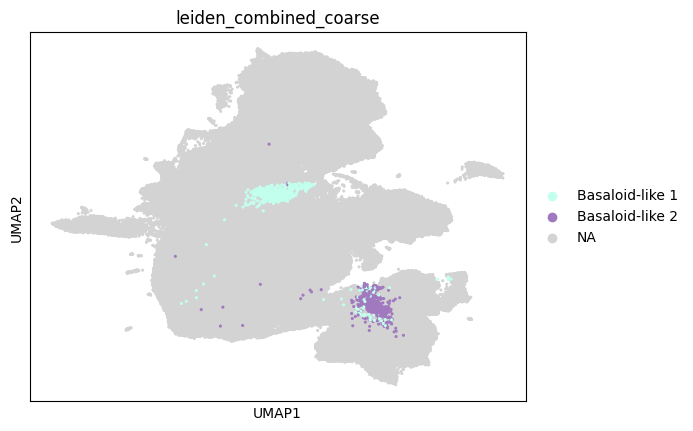

In [23]:
sc.pl.umap(adata, color = 'leiden_combined_coarse', groups = ['Basaloid-like 1', 'Basaloid-like 2', 'Ciliated'], size = 20)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


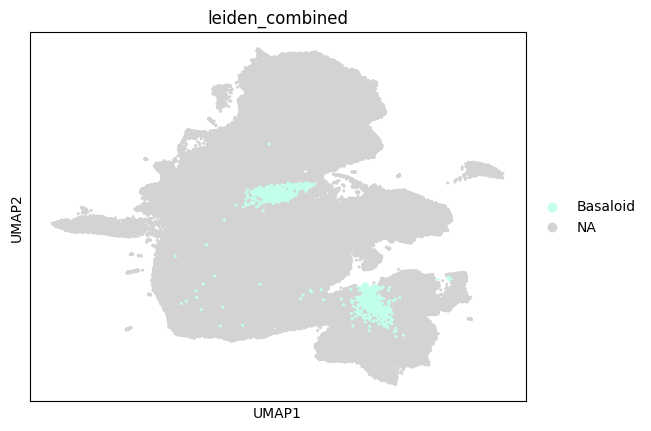

In [24]:
sc.pl.umap(adata, color = 'leiden_combined', groups = ['Basaloid'], size = 20)

In [25]:
bdata.X

<614695x17591 sparse matrix of type '<class 'numpy.float32'>'
	with 1441145304 stored elements in Compressed Sparse Row format>

In [26]:
import anndata
adata = anndata.AnnData(bdata.X, var=bdata.var, obs=adata.obs, obsm = adata.obsm, obsp = adata.obsp)

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden_combined_coarse')

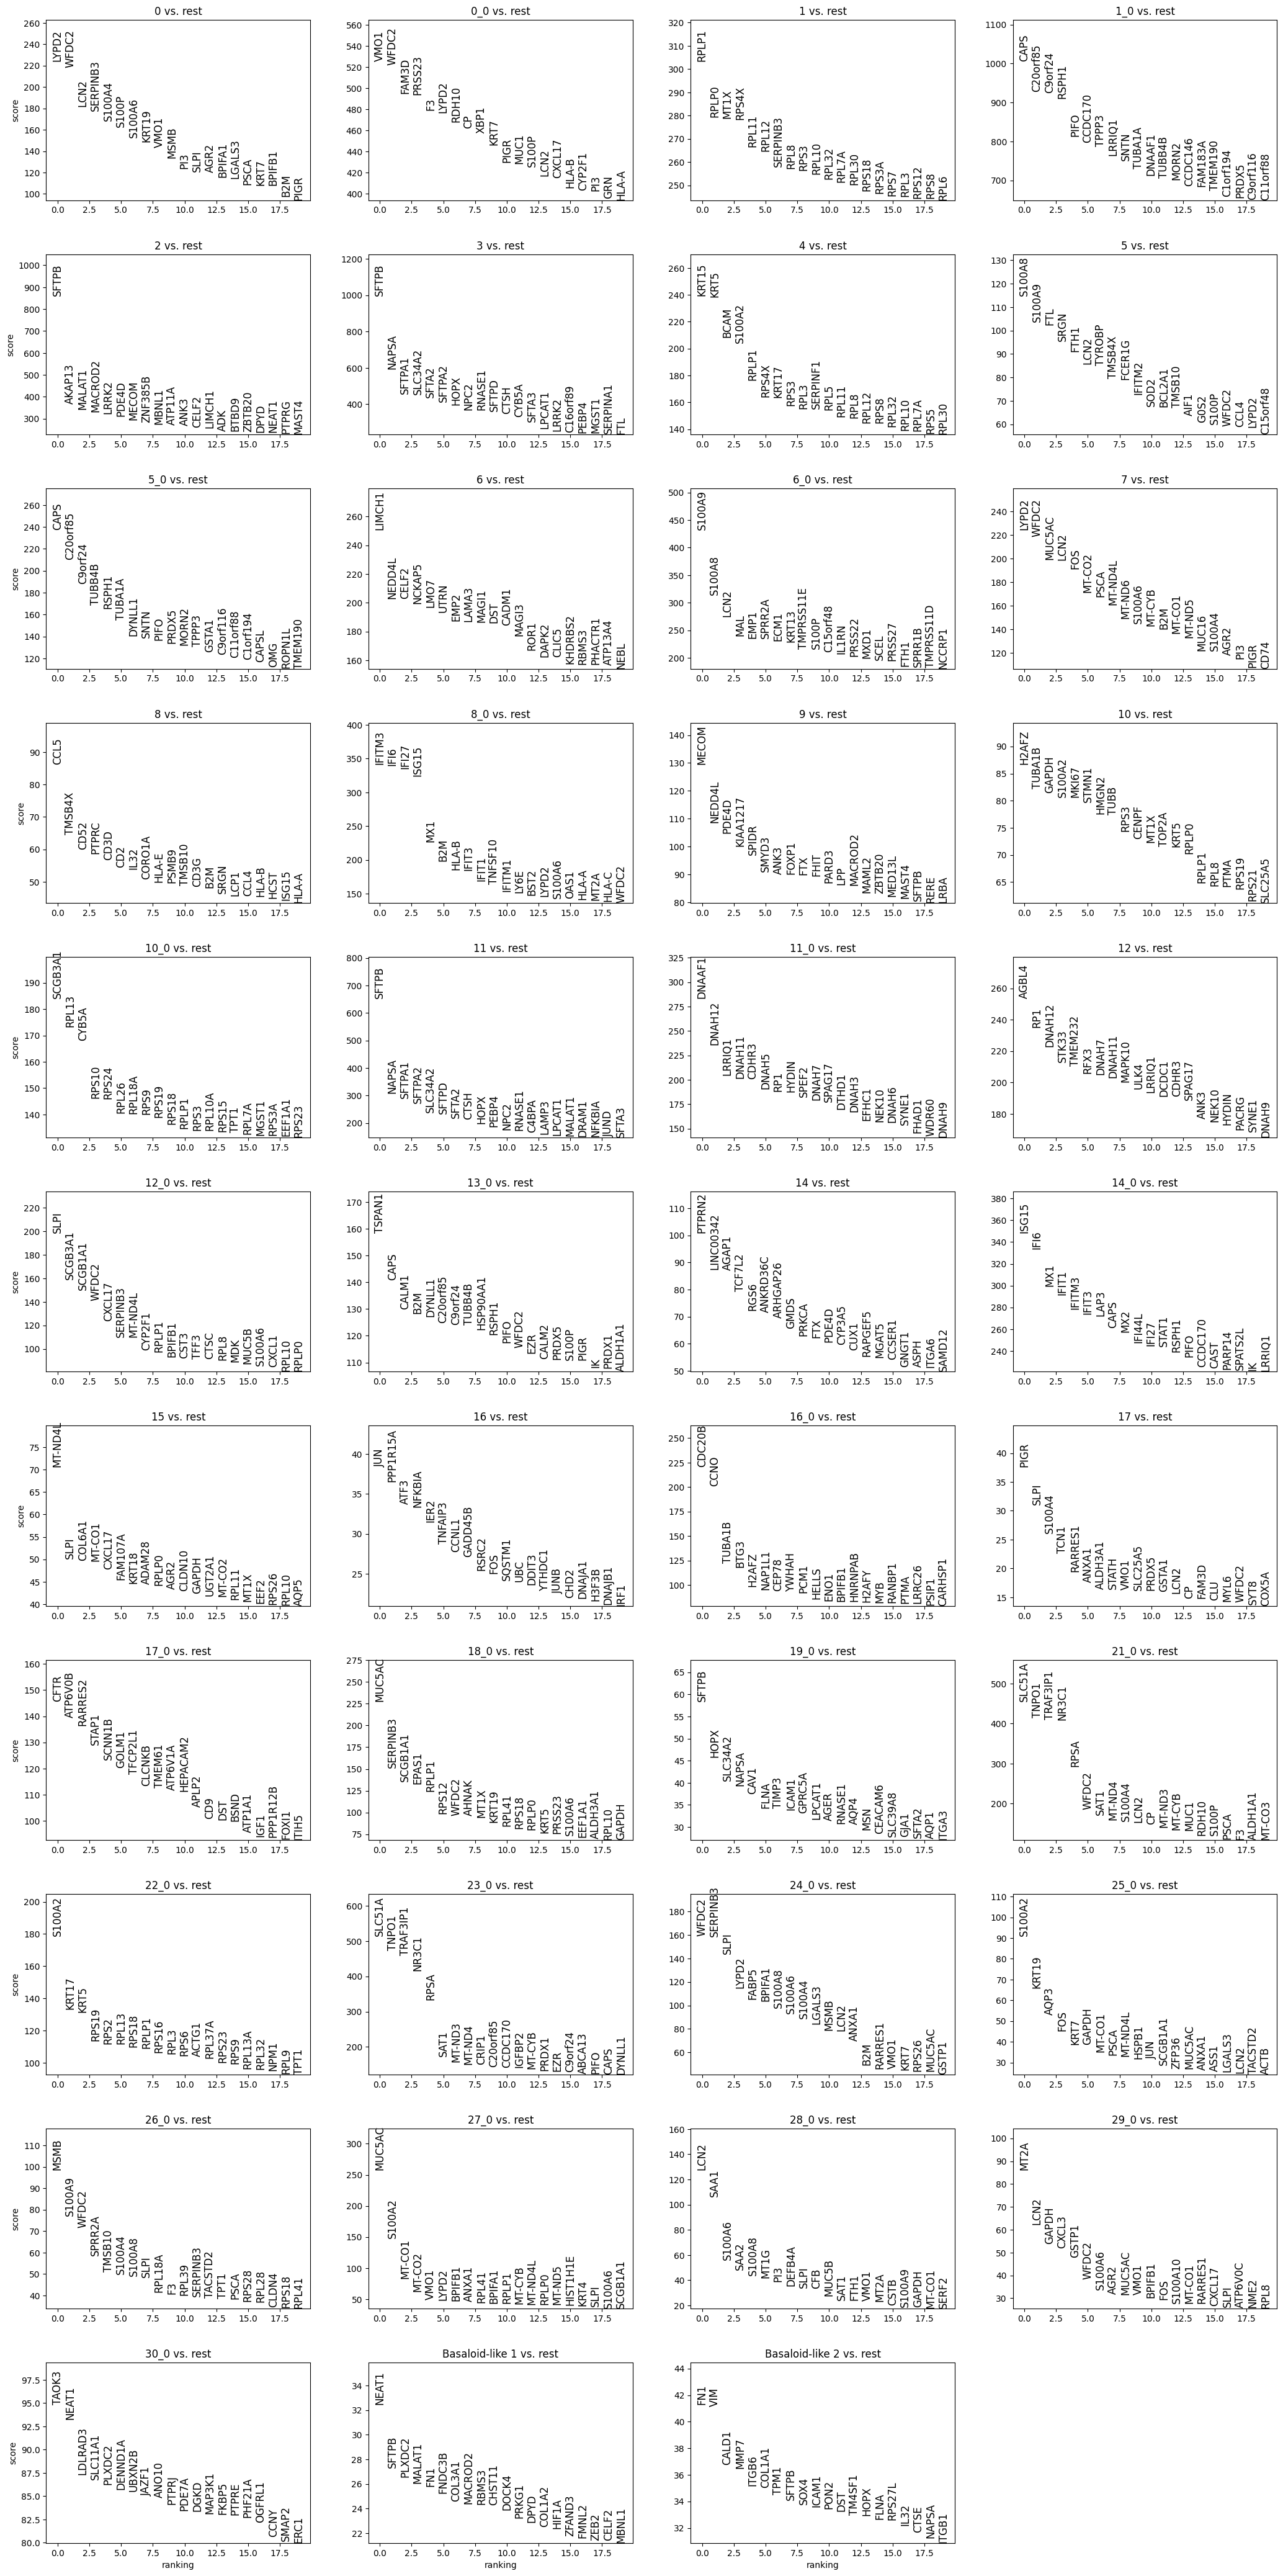

In [28]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, fontsize=12)

/nfs/team205/ac65/miniconda3/envs/celltypist_new/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


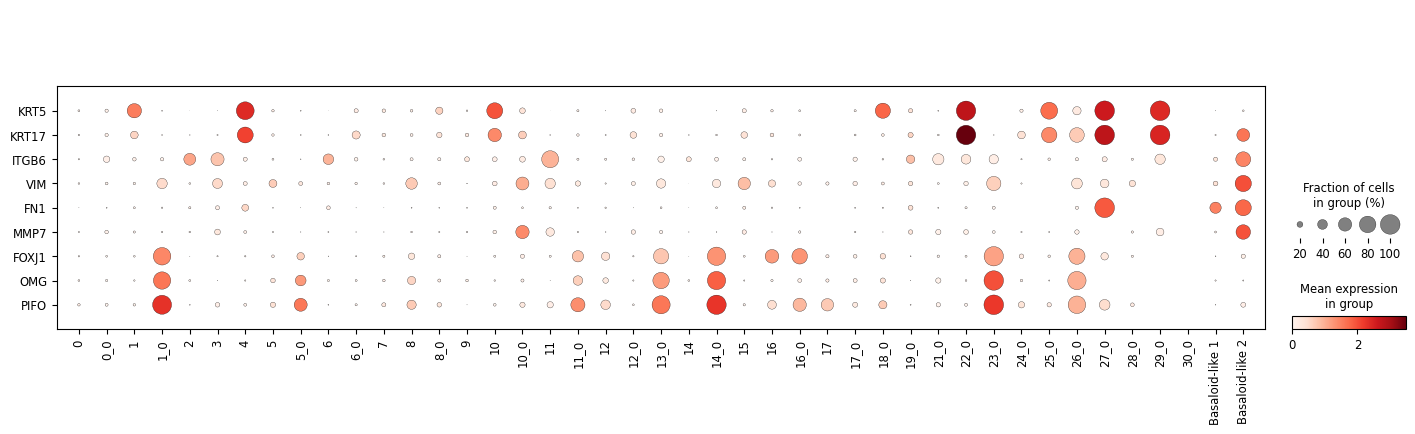

In [29]:
sc.pl.dotplot(adata, ['KRT5', 'KRT17', 'ITGB6', 'VIM', 'FN1', 'MMP7', 'FOXJ1', 'OMG', 'PIFO'], groupby = "leiden_combined_coarse", swap_axes = True)

In [30]:
# Subset data to include only cells from Leiden cluster 13
subset_adata = adata_refine[adata_refine.obs['leiden'] == 'Basaloid-like 2']

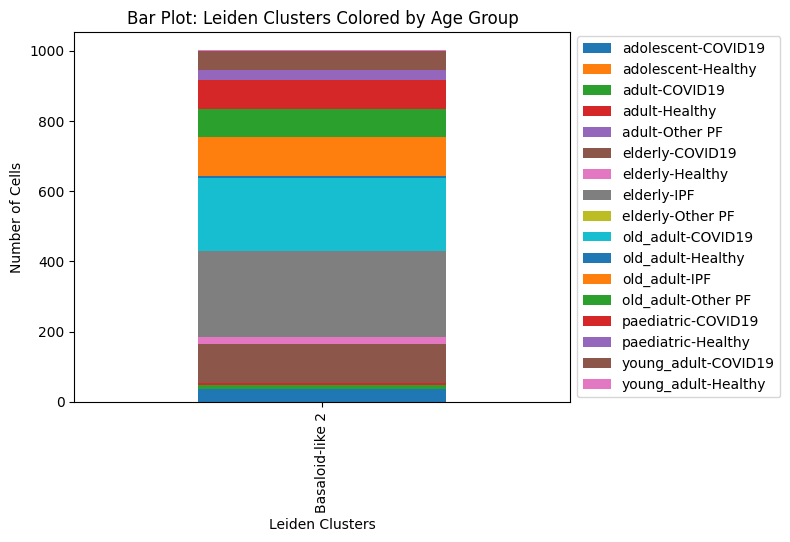

In [31]:
import matplotlib.pyplot as plt

# Group the data by leiden clusters and age groups
grouped_data = subset_adata.obs.groupby(['leiden', 'age_status']).size().unstack()

# Plot horizontal bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Leiden Clusters')
ax.set_ylabel('Number of Cells')
ax.set_title('Bar Plot: Leiden Clusters Colored by Age Group')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


In [32]:
subset_adata.obs['age_status'].value_counts()

elderly-IPF            244
old_adult-COVID19      207
elderly-COVID19        111
old_adult-IPF          110
paediatric-COVID19      83
old_adult-Other PF      80
young_adult-COVID19     54
adolescent-COVID19      35
paediatric-Healthy      29
elderly-Healthy         20
adult-COVID19           11
adult-Healthy            6
old_adult-Healthy        6
young_adult-Healthy      4
adolescent-Healthy       1
adult-Other PF           1
elderly-Other PF         1
Name: age_status, dtype: int64

In [33]:
subset_adata.obs['file_of_origin'].value_counts()

Bharat_2020.h5ad                695
Yoshida_2022.h5ad               132
Melms_2021.h5ad                 121
Loske_2021.h5ad                  21
Ziegler_2021.h5ad                13
Delorey_2021_COVID_only.h5ad     12
Chua_2020.h5ad                    5
Trump_2020.h5ad                   4
Name: file_of_origin, dtype: int64

In [34]:
subset_adata.obs['donor_harmonised'].value_counts()

PB 1            184
VUILD64         115
VUILD60          99
VUILD59          87
TX_Recipient     53
               ... 
NP37              1
NP39              1
D7                1
PP2               1
AP11              1
Name: donor_harmonised, Length: 103, dtype: int64

In [35]:
pd.crosstab (subset_adata.obs['author_ann_harmonised'], subset_adata.obs['file_of_origin'])

file_of_origin             Bharat_2020.h5ad  Chua_2020.h5ad  \
author_ann_harmonised                                         
AT1                                       3               0   
AT2                                       5               0   
Airway club                               0               0   
Airway goblet                             0               0   
Airway mucous                             0               0   
Basal                                     3               0   
Basal 1                                   7               0   
Basal 2                                   1               0   
Basal 3                                   3               0   
Ciliated                                  3               0   
Ciliated 1                                0               0   
Ciliated Cells                            0               0   
Club                                      1               0   
Cycling basal                             0               0   
Cycling epithelial                        0               0   
Developing Ciliated Cells                 0               0   
ECM-high epithelial                       0               0   
Epithelial                                0               4   
Goblet 2 BPIFA2+                          0               0   
Goblet 2 PLAU+                            0               0   
Hillock                                   0               0   
Ionocyte                                  0               0   
KRT5-/KRT17+                            402               0   
MUC5B+                                    1               0   
Melanocyte                                0               0   
Neuroendocrine                            0               0   
SCGB3A2+                                 20               0   
Secretory                                 0               0   
Secretory GALNT4+                         0               0   
Squamous                                  0               1   
Squamous-ViralResp                        0               0   
Transitional AT2                        246               0   

file_of_origin             Delorey_2021_COVID_only.h5ad  Loske_2021.h5ad  \
author_ann_harmonised                                                      
AT1                                                   1                0   
AT2                                                   5                0   
Airway club                                           0                0   
Airway goblet                                         0                0   
Airway mucous                                         0                0   
Basal                                                 0               20   
Basal 1                                               0                0   
Basal 2                                               0                0   
Basal 3                                               0                0   
Ciliated                                              3                0   
Ciliated 1                                            0                0   
Ciliated Cells                                        0                0   
Club                                                  0                0   
Cycling basal                                         0                0   
Cycling epithelial                                    0                0   
Developing Ciliated Cells                             0                0   
ECM-high epithelial                                   0                0   
Epithelial                                            0                1   
Goblet 2 BPIFA2+                                      0                0   
Goblet 2 PLAU+                                        0                0   
Hillock                                               0                0   
Ionocyte                                              0                0   
KRT5-/KRT17+                     

In [36]:
# Subset data to include only cells from Leiden cluster 13
subset_adata = adata_refine[adata_refine.obs['leiden'] == 'Basaloid-like 1']

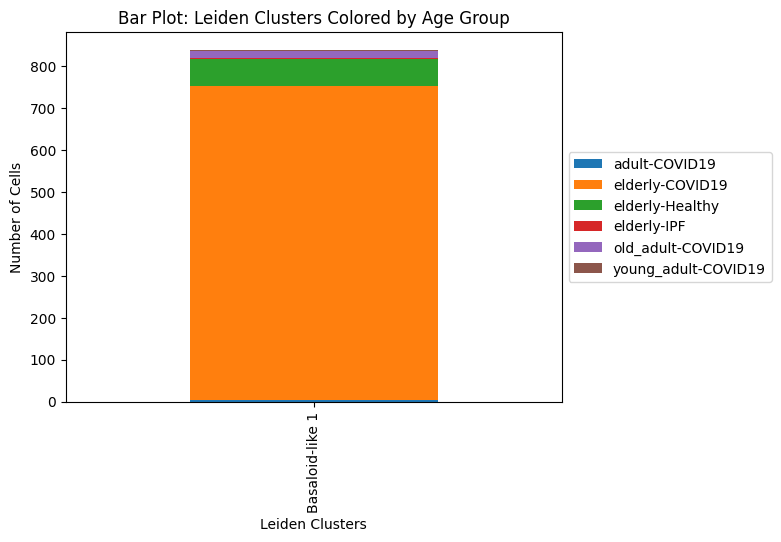

In [37]:
import matplotlib.pyplot as plt

# Group the data by leiden clusters and age groups
grouped_data = subset_adata.obs.groupby(['leiden', 'age_status']).size().unstack()

# Plot horizontal bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Leiden Clusters')
ax.set_ylabel('Number of Cells')
ax.set_title('Bar Plot: Leiden Clusters Colored by Age Group')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


In [38]:
subset_adata.obs['age_status'].value_counts()

elderly-COVID19        750
elderly-Healthy         64
old_adult-COVID19       15
young_adult-COVID19      4
adult-COVID19            3
elderly-IPF              3
Name: age_status, dtype: int64

In [39]:
subset_adata.obs['file_of_origin'].value_counts()

Melms_2021.h5ad                 811
Delorey_2021_COVID_only.h5ad     18
Bharat_2020.h5ad                  9
Ziegler_2021.h5ad                 1
Name: file_of_origin, dtype: int64

In [40]:
subset_adata.obs['donor_harmonised'].value_counts()

L06cov                  574
L03cov                   66
C53ctr                   37
L17cov                   24
L15cov                   15
L05cov                   10
C51ctr                    9
C55ctr                    9
L18cov                    8
L13cov                    8
L09cov                    7
L08cov                    6
L12cov                    5
L01cov                    5
C52ctr                    5
TX_Recipient              4
L10cov                    4
L07cov                    3
L19cov                    3
L11cov                    3
D5                        3
VUILD59                   3
C56ctr                    3
D16                       2
D13                       2
D12_2                     2
D11                       2
L16cov                    2
D10                       2
L21cov                    2
L22cov                    2
PB 1                      2
D8_1                      2
COVID19_Participant8      1
D15                       1
C54ctr              

In [41]:
pd.crosstab (subset_adata.obs['author_ann_harmonised'], subset_adata.obs['file_of_origin'])

file_of_origin         Bharat_2020.h5ad  Delorey_2021_COVID_only.h5ad  \
author_ann_harmonised                                                   
AT1                                   0                             1   
AT2                                   0                             7   
Airway basal                          0                             0   
Airway ciliated                       0                             0   
Airway club                           0                             0   
Airway goblet                         0                             0   
Airway mucous                         0                             0   
Basal                                 1                             0   
Ciliated                              0                             5   
Ciliated-diff                         2                             0   
Cycling epithelial                    0                             0   
ECM-high epithelial                   0                             0   
KRT8+ PATS/ADI/DATPs                  0                             4   
Secretory                             0                             1   
Squamous                              0                             0   
Transitional AT2                      6                             0   
Tuft-like                             0                             0   

file_of_origin         Melms_2021.h5ad  Ziegler_2021.h5ad  
author_ann_harmonised                                      
AT1                                 20                  0  
AT2                                 75                  0  
Airway basal                         2                  0  
Airway ciliated                      3                  0  
Airway club                          8                  0  
Airway goblet                       13                  0  
Airway mucous                       39                  0  
Basal                                0                  0  
Ciliated                             0                  0  
Ciliated-diff                        0                  0  
Cycling epithelial                  46                  0  
ECM-high epithelial                603                  0  
KRT8+ PATS/ADI/DATPs                 0                  0  
Secretory                            0                  0  
Squamous                             0                  1  
Transitional AT2                     0                  0  
Tuft-like                            2                  0

In [42]:
adata

AnnData object with n_obs × n_vars = 614695 × 17591
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'age', 'age_group', 'status', 'age_status', 'file_of_origin', 'sample_id', 'Sex', 'Age_bin', 'Group', 'Ethnicity_inferred', 'Smoker', 'COVID_status', 'COVID_severity', 'First_symptoms_hospitalisation_interval', 'First_symptoms_collection_interval', 'Positive_test_collection_interval', 'Sample_location', 'Kit_version', 'dataset', 'Sanger_sample_ID', 'Cell_type_annotation_level3', 'Cell_type_annotation_level1', 'Cell_type_annotation_level2', 'log1p_n_counts', 'log1p_n_genes', 'percent_ribo', 'n_counts_total_sarscov2', 'percent_total_sarscov2', 'n_counts_sarscov2', 'percent_sarscov2', 'scrublet_score', 'donor_id', 'Age', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_

In [43]:
adata.write('/nfs/team205/ac65/ALI_COVID19/datasets_integration_ALI/harmony_final_basaloid_subsets.h5ad')